# Traffic Sign Recognition

In this tutorial, we will get our hands dirty with deep learning by solving a real world problem. The problem we are gonna tackle is The German Traffic Sign Recognition Benchmark(GTSRB). The problem is to to recognize the traffic sign from the images. Solving this problem is essential for self-driving cars to operate on roads.
Training set includes about 39000 images while test set has around 12000 images. Images are not guaranteed to be of fixed dimensions and the sign is not necessarily centered in each image

Image< 2D conv(#filters, kernel size) < Max Pool(kernel size) < 2D conv < Max Pool< Flatten< Fully connected(#units) < Softmax

## Image preprocessing

**Load images and reshape them to 32*32.
**One hot encode labels 43D array
**RGB to grayscale

In [1]:
N_CLASSES=43
RESIZED_IMAGE=(32,32)

In [2]:
# Function to read images, resize, converts, onehot encode the label

# All the images are of variable size, lets convert them to same shape

In [3]:
import matplotlib.pyplot as plt
import glob
from skimage.color import rgb2lab
from skimage.transform import resize
from collections import namedtuple
import numpy as np
np.random.seed(101)
%matplotlib inline

# READING FILE FOR TF

In [4]:
Dataset = namedtuple('Dataset', ['X', 'y'])

def to_tf_format(imgs):
    return np.stack([img[:, :, np.newaxis] for img in imgs], axis=0).astype(np.float32)

def read_dataset_ppm(rootpath, n_labels, resize_to):
    images = []
    labels = []
    
    for c in range(n_labels):
        full_path = rootpath + '/' + format(c, '05d') + '/'
        for img_name in glob.glob(full_path + "*.ppm"):
            img = plt.imread(img_name).astype(np.float32)
            img = rgb2lab(img / 255.0)[:,:,0]
            if resize_to:
                img = resize(img, resize_to, mode='reflect')
            label = np.zeros((n_labels, ), dtype=np.float32)
            label[c] = 1.0
            images.append(img.astype(np.float32))
            labels.append(label)
    return Dataset(X = to_tf_format(images).astype(np.float32),
                 y = np.matrix(labels).astype(np.float32))

dataset = read_dataset_ppm('GTSRB/Final_Training/Images', N_CLASSES, RESIZED_IMAGE)
print(dataset.X.shape)
print(dataset.y.shape)



(39209, 32, 32, 1)
(39209, 43)


In [16]:
dataset

Dataset(X=array([[[[ 100.        ],
         [ 100.        ],
         [ 100.        ],
         ..., 
         [ 100.        ],
         [ 100.        ],
         [ 100.        ]],

        [[ 100.        ],
         [ 100.        ],
         [ 100.        ],
         ..., 
         [ 100.        ],
         [ 100.        ],
         [ 100.        ]],

        [[ 100.        ],
         [ 100.        ],
         [ 100.        ],
         ..., 
         [ 100.        ],
         [ 100.        ],
         [ 100.        ]],

        ..., 
        [[  97.62533569],
         [  99.12327576],
         [  99.53224945],
         ..., 
         [  99.70491791],
         [  99.54701996],
         [  99.53102112]],

        [[  99.06925201],
         [  99.32100677],
         [  99.63559723],
         ..., 
         [  99.69046783],
         [  99.67693329],
         [  99.57378387]],

        [[  99.2782135 ],
         [  99.48441315],
         [  99.66602325],
         ..., 
         [  99.699

# READING FILE IN KERAS

As you can see from the representative images above, images vary a lot in illumination. They also vary in size. So, let’s write a function to do histogram equalization in HSV color space and resize the images to a standard size:

In [ ]:
NUM_CLASSES = 43
IMG_SIZE = 48


In [ ]:
def preprocess_img(img):
    # Histogram normalization in v channel
    hsv = color.rgb2hsv(img)
    hsv[:, :, 2] = exposure.equalize_hist(hsv[:, :, 2])
    img = color.hsv2rgb(hsv)

    # central square crop
    min_side = min(img.shape[:-1])
    centre = img.shape[0] // 2, img.shape[1] // 2
    img = img[centre[0] - min_side // 2:centre[0] + min_side // 2,
              centre[1] - min_side // 2:centre[1] + min_side // 2,
              :]

    # rescale to standard size
    img = transform.resize(img, (IMG_SIZE, IMG_SIZE))

    # roll color axis to axis 0
    img = np.rollaxis(img, -1)

    return img

In [7]:
from skimage import io
import os
import glob
import numpy as np
from skimage import color, exposure, transform


def get_class(img_path):
    return int(img_path.split('/')[-2])

root_dir = 'GTSRB/Final_Training/Images/'
imgs = []
labels = []

all_img_paths = glob.glob(os.path.join(root_dir, '*/*.ppm'))
np.random.shuffle(all_img_paths)
for img_path in all_img_paths:
    img = preprocess_img(io.imread(img_path))
    label = get_class(img_path)
    imgs.append(img)
    labels.append(label)

X = np.array(imgs, dtype='float32')
# Make one hot targets
Y = np.eye(NUM_CLASSES, dtype='uint8')[labels]

/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [8]:
X.shape

(39209, 3, 48, 48)

In [9]:
Y.shape

(39209, 43)

## FROM HERE

In [15]:
#“print the feature vector of the first sample, together with its label”

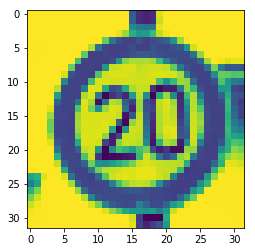

In [5]:
plt.imshow(dataset.X[0,:,:,:].reshape(RESIZED_IMAGE))

In [6]:
dataset.y[0,:]

matrix([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

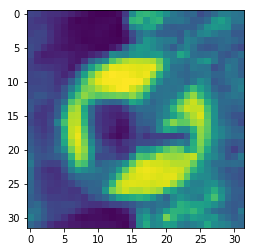

In [7]:
plt.imshow(dataset.X[-1,:,:,:].reshape(RESIZED_IMAGE))
#convert from 32,32,1 to 32,32

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
X_train, X_test, y_train, y_test = train_test_split(dataset.X, dataset.y, test_size=0.33, random_state=42)

In [10]:
X_train.shape

(26270, 32, 32, 1)

In [11]:
X_test.shape

(12939, 32, 32, 1)

In [12]:
y_train.shape

(26270, 43)

In [13]:
y_test.shape

(12939, 43)

# Train the Model and Predict

Function to create mini batch
** observations, labels, and batch size as arguments and returns a minibatch generator

In [14]:
def minibatcher(X, y, batch_size, shuffle):
  assert X.shape[0] == y.shape[0]
  n_samples = X.shape[0]
  
  if shuffle:
    idx = np.random.permutation(n_samples)
  else:
    idx = list(range(n_samples))
  
  for k in range(int(np.ceil(n_samples/batch_size))):
    from_idx = k*batch_size
    to_idx = (k+1)*batch_size
    yield X[idx[from_idx:to_idx], :, :, :], y[idx[from_idx:to_idx], :]

In [15]:
for mb in minibatcher(X_train, y_train, 10000, True):
  print(mb[0].shape, mb[1].shape)

(10000, 32, 32, 1) (10000, 43)
(10000, 32, 32, 1) (10000, 43)
(6270, 32, 32, 1) (6270, 43)


In [16]:
import tensorflow as tf

# Initialize Weights and Bias

Lets use “Xavier initialization for the coefficients (weights) and 0-initialization for the biases”

￼Y = sigma(Wx+b)

In [17]:
def create_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

def create_biases(size):
    return tf.Variable(tf.constant(0.05, shape=[size]))


In [18]:
def create_fc_layer(input,          
             num_inputs,    
             num_outputs,
             use_relu=True):
    
    #Let's define trainable weights and biases.
    weights = create_weights(shape=[num_inputs, num_outputs])
    biases = create_biases(num_outputs)
 
    layer = tf.matmul(input, weights) + biases
    if use_relu:
        layer = tf.nn.relu(layer)
 
    return layer


def create_fc_layer(input,          
             num_inputs,    
             num_outputs,
             use_relu=True):
    
    #Let's define trainable weights and biases.
    weights = create_weights(shape=[num_inputs, num_outputs])
    biases = create_biases(num_outputs)
 
    layer = tf.matmul(input, weights) + biases
    if use_relu:
        layer = tf.nn.relu(layer)
 
    return layer
 tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')
                               
Conv Layer
    weights = create_weights(shape=[conv_filter_size, conv_filter_size, num_input_channels, num_filters])
       We create biases using the create_biases function. These are also trained.
    biases = create_biases(num_filters)
 
        Creating the convolutional layer
    layer = tf.nn.conv2d(input=input,
                     filter=weights,
                     strides=[1, 1, 1, 1],
                     padding='SAME')
 
    layer += biases
 
        #We shall be using max-pooling.  
    layer = tf.nn.max_pool(value=layer,
                            ksize=[1, 2, 2, 1],
                            strides=[1, 2, 2, 1],
                            padding='SAME')
        #Output of pooling is fed to Relu which is the activation function for us.
    layer = tf.nn.relu(layer)
 
    return layer

In [19]:
def fc_no_activation_layer(in_tensors, n_units):
    w = tf.get_variable('fc_W', 
    [in_tensors.get_shape()[1], n_units],
    tf.float32,
    tf.contrib.layers.xavier_initializer())
    b = tf.get_variable('fc_B',
    [n_units, ],
    tf.float32,
    tf.constant_initializer(0.0))
    return tf.matmul(in_tensors, w) + b
def fc_layer(in_tensors, n_units):
    return tf.nn.relu(fc_no_activation_layer(in_tensors, n_units))
def maxpool_layer(in_tensors,sampling):
    return tf.nn.max_pool(in_tensors,[1,sampling,sampling,1],[1,sampling,sampling,1],"SAME")
#tf.nn.max_pool(value=layer,
                              # ksize=[1, 2, 2, 1],
                               #strides=[1, 2, 2, 1],
                               #padding='SAME')

# create_convolutional_layer(input,num_input_channels, conv_filter_size,num_filters): 

def conv_layer(in_tensors, kernel_size, n_units):
    w = tf.get_variable('conv_W', 
    [kernel_size, kernel_size,in_tensors.get_shape()[3], n_units],
    tf.float32,
    tf.contrib.layers.xavier_initializer())
    b = tf.get_variable('conv_B',
    [n_units, ],
    tf.float32,
    tf.constant_initializer(0.0))
    return tf.nn.relu(tf.nn.conv2d(in_tensors, w, [1, 1, 1, 1], 'SAME') + b)
    
    
def dropout(in_tensors, keep_proba, is_training):
    return tf.cond(is_training, lambda: tf.nn.dropout(in_tensors, keep_proba), lambda: in_tensors)
  

In [20]:
def model(in_tensors, is_training):
    # First layer: 5x5 2d-conv, 32 filters, 2x maxpool, 20% drouput
    with tf.variable_scope('l1'):
        l1 = maxpool_layer(conv_layer(in_tensors, 5, 32), 2)
        l1_out = dropout(l1, 0.8, is_training)
    #Second layer: 5x5 2d-conv, 64 filters, 2x maxpool, 20% drouput
    with tf.variable_scope('l2'):
        l2 = maxpool_layer(conv_layer(l1_out, 5, 64), 2)
        l2_out = dropout(l1, 0.8, is_training)
    
    with tf.variable_scope('flatten'):
        l2_out_flat = tf.layers.flatten(l2_out)
    # Fully collected layer, 1024 neurons, 40% dropout 
    with tf.variable_scope("l3"):
        l3=fc_layer(l2_out_flat,1024)
        l3_out = dropout(l3, 0.8, is_training)
    # Output
    with tf.variable_scope('out'):
        out=fc_no_activation_layer(l3_out, N_CLASSES)
    
    return out
        
        

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Epoch= 0
 train_loss_score= 9.367118
Epoch= 1
 train_loss_score= 0.5706269
Epoch= 2
 train_loss_score= 0.3352243
Epoch= 3
 train_loss_score= 0.22952546
Epoch= 4
 train_loss_score= 0.17006966
Epoch= 5
 train_loss_score= 0.13478582
Epoch= 6
 train_loss_score= 0.112195
Epoch= 7
 train_loss_score= 0.09246047
Epoch= 8
 train_loss_score= 0.089384735
Epoch= 9
 train_loss_score= 0.07909966
TEST SET PERFORMANCE
 test_loss_score= 0.107170284
             precision    recall  f1-score   support

          0       0.94      0.95      0.94        61
          1       0.99      0.94      0.96       763
          2       0.93      0.99      0.96       750
          3       0.91      0.97      0.94       466
          4       0.97      0.98      0.98       672
          5       0.98      0.90      0.94       629


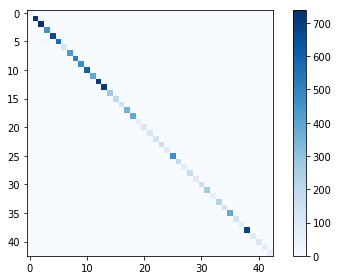

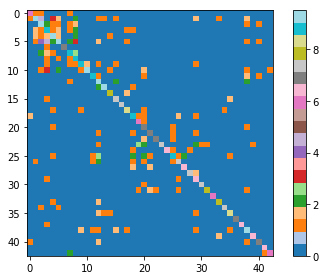

In [21]:
from sklearn.metrics import classification_report, confusion_matrix


def train_model(X_train, y_train, X_test, y_test, learning_rate, max_epochs, batch_size):

  in_X_tensors_batch = tf.placeholder(tf.float32, shape = (None, RESIZED_IMAGE[0], RESIZED_IMAGE[1], 1))
  in_y_tensors_batch = tf.placeholder(tf.float32, shape = (None, N_CLASSES))
  is_training = tf.placeholder(tf.bool)

  logits = model(in_X_tensors_batch, is_training)
  out_y_pred = tf.nn.softmax(logits)
  loss_score = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=in_y_tensors_batch)
  loss = tf.reduce_mean(loss_score)
  optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

  with tf.Session() as session:
    session.run(tf.global_variables_initializer())

    for epoch in range(max_epochs):
      print("Epoch=", epoch)
      tf_score = []
      
      for mb in minibatcher(X_train, y_train, batch_size, shuffle = True):
        tf_output = session.run([optimizer, loss], 
                                feed_dict = {in_X_tensors_batch : mb[0], 
                                             in_y_tensors_batch : mb[1],
                                             is_training : True})
      
        tf_score.append(tf_output[1])
      print(" train_loss_score=", np.mean(tf_score))
    
    # after the training is done, time to test it on the test set
    print("TEST SET PERFORMANCE")
    y_test_pred, test_loss  = session.run([out_y_pred, loss], 
                                          feed_dict = {in_X_tensors_batch : X_test, 
                                                       in_y_tensors_batch : y_test,
                                                       is_training : False})
    
    print(" test_loss_score=", test_loss)
    y_test_pred_classified = np.argmax(y_test_pred, axis=1).astype(np.int32)
    y_test_true_classified = np.argmax(y_test, axis=1).astype(np.int32)
    print(classification_report(y_test_true_classified, y_test_pred_classified))
    
    cm = confusion_matrix(y_test_true_classified, y_test_pred_classified)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.tight_layout()
    plt.show()
    
    # And the log2 version, to enphasize the misclassifications
    plt.imshow(np.log2(cm + 1), interpolation='nearest', cmap=plt.get_cmap("tab20"))
    plt.colorbar()
    plt.tight_layout()
    plt.show()


tf.reset_default_graph()
train_model(X_train, y_train, X_test, y_test, 0.001, 10, 256)